# TPC2 - Integração e Métodos Matriciais

<ul>
    <li>Não deve escrever o seu nome nem nenhum código identificador em nenhum sítio. </li>
    <li>Deve entregar ESTE Notebook de Jupyter.</li>
    <li>O trabalho é individual. Podem e devem haver discussões com colegas mas o resultado entregue é individual. </li>
    <li>Não deve acrescentar ou apagar nenhuma célula. </li>
    <li>Todas as explicações devem ser claras e concisas. </li>
    <li>É preferível fazer menos e fazer bem que muito e mal. </li>
    <li>O método @jit(nopython=True) do pacote numba pode diminuir o tempo de cálculo.</li>
    <li>A não verificação de alguma destas regras leva ao anulamento e exclusão da prova.</li>
</ul>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigh
from numpy.linalg import inv
from scipy.linalg import eigh_tridiagonal
from numba import njit

# Oscilador Harmónico Quântico I

Num curso introdutório de mecânica quântica abordam-se dois sistemas paradigmáticos: a partícula confinada a uma caixa unidimensional e o oscilador harmónico. 

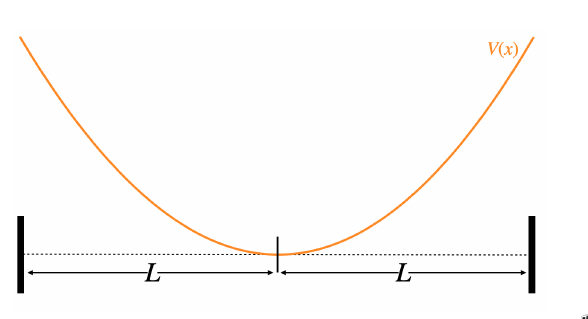

Neste problema re-visitamos estes problemas usando espaços vetoriais de dimensão finita e os métodos matriciais que aprendeu nesta cadeira.

Considere uma partícula quântica de massa $M$ confinada a uma caixa
unidimensional de tamanho $2L$ cujas paredes são impenetráveis. A
sua posição $x$ está então confinada ao intervalo $x\in[-L,L]$,
dentro do qual a partícula sofre a acção de um potencial harmónico
$V(x)=\frac{1}{2}M\omega^{2}x^{2}$, onde $\omega>0$ tem dimensões
de frequência (sistema representado ao lado). Os estados próprios
desta partícula na caixa são soluções da seguinte equação de Schrödinger
independente do tempo,


\begin{equation}
-\frac{\hbar^{2}}{2M}\frac{d^{2}}{dx^{2}}\Psi_{E}(x)+\frac{1}{2}M\omega^{2}x^{2}\Psi_{E}(x)=E\Psi_{E}(x),\label{eq:Schrodinger}
\end{equation}
onde $E$ e $\Psi_{E}(x)$ são, respectivamente, a energia própria
e a correspondente função de onda própria. As paredes impenetráveis
da caixa podem ser impostas em qualquer estado $\psi\left(x\right)$
através da condição $\psi\left(\pm L\right)\!=\!0$. Esta condição
fronteira implica que qualquer estado permitido $\psi(x)$ pode ser
expresso como uma combinação linear de ondas estacionárias (e normalizadas)
na caixa, isto é,

\begin{equation}
\psi(x)=\sum_{n=0}^{\infty}a_{n}\Phi_{n}(x),\label{eq: expans=0000E3o}
\end{equation}
onde os elementos da base ortonormada de funções, $\left\{ \Phi_{n}(x)\right\} _{n}$,
são dados por


\begin{eqnarray*}
\Phi_{n}\left(x\right) & = & \begin{cases}
\frac{1}{\sqrt{L}}\cos\left(\frac{\pi\left(n+1\right)}{2L}x\right) & n\,\,\,\text{par}\\
\frac{1}{\sqrt{L}}\sin\left(\frac{\pi\left(n+1\right)}{2L}x\right) & n\,\,\,\text{ímpar}
\end{cases}
\end{eqnarray*}
e os coeficientes $a_{n}$ podem ser obtidos pelo integral de projeção,


$$ a_{n}=\int_{-L}^{L}dx\Phi_{n}^{*}\left(x\right)\psi\left(x\right). $$

Com base nisto, responda às seguintes questões:

1. Utilizando $E_{0}\!=\!\hbar\omega$ e $L_{0}\!=\!\sqrt{\hbar/M\omega}$
como escalas naturais de energia e comprimento, adimensionalize a
equação de Schrödinger (Eq. 1.1) e as funções
$\Phi_{n}$. Defina $\ell=L/L_{0}$ (metade do tamanho da caixa em
unidades de $L_{0}$) e represente as $6$ primeiras funções adimensionalizadas
num mesmo gráfico para $\ell=0.3$.

Adimensionalizando a primeira equação:
$$
-\frac{\hbar^{2}}{2M}\frac{d^{2}}{dx^{2}}\Psi_{E}(x)+\frac{1}{2}M\omega^{2}x^{2}\Psi_{E}(x)=E \Psi_{E}(x)
$$
Obtemos, assim:

$$
\frac{d^{2}}{dx^{2}}\Psi'{E}(x) =\frac{d^{2}}{dx^{2}}\Psi{E}(x) L_{0}^2 = \Psi_{E}(x)  \left[ x'^2-\left(2\frac{E}{E_{0}}\right)\right]
$$
Onde $x' = \frac{x}{L_{0}}$ é a unidade adimensionalizada de comprimento, e $\Psi'_{E}$ é a função $\Psi$ adimensionalizada.



Para a Equação $\Phi_{n}(x)$, obtemos:
$$
\begin{eqnarray*}
\Phi'{n}\left(x\right) = \Phi{n} \sqrt{L_{0}} = & = & \begin{cases}
\frac{1}{\sqrt{\ell}}\cos\left(\frac{\pi\left(n+1\right)}{2\ell}x'\right) & n\,\,\,\text{par}\\
\frac{1}{\sqrt{\ell}}\sin\left(\frac{\pi\left(n+1\right)}{2\ell}x'\right) & n\,\,\,\text{ímpar}
\end{cases}
\end{eqnarray*}
$$
Onde $x' = \frac {x}{L_0}$, e $\Phi'{n}$ é a função $\Phi{n}$ adimensionalizada.

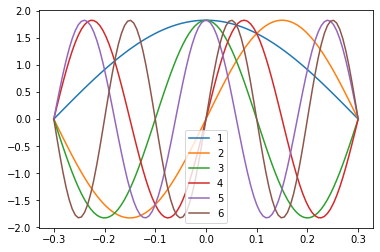

In [2]:
l = 0.3
@njit
def sincos(x, n, l):
    if n % 2 == 0:
        return (1/np.sqrt(l))*np.cos((np.pi*(n+1)*x)/(2*l))
    if n % 2 != 0:
        return (1/np.sqrt(l))*np.sin((np.pi*(n+1)*x)/(2*l))
    
c = np.linspace(-0.3, 0.3, 100)
for i in range(6):
    plt.plot(c, [sincos(j,i,l) for j in c], label = f'{i+1}')
    plt.legend()

2. Escreva uma rotina que determine os primeiros $N$ coeficientes $a_{n}$
para a seguinte função

$$
\psi\left(x\right)=A\exp\left(-\frac{\left(x-x_{0}\right)^{2}}{2\sigma^{2}}\right)\cos\left(\frac{\pi x}{2L}\right).
$$

onde $x_{0}=L/2$ e $\sigma=L/2$ e $\ell=0.3$. Não se esqueça
de normalizar a função de onda (i.e., determinar $A$ numericamente)
e de adimensionalizá-la. Use o método de Simpson-1/3
para as integrações numéricas. Represente no mesmo gráfico $\psi\left(x\right)$
e a sua expansão 1.2 para $N=1,2,4,8,16,32$. 

Substituindo $x_{0}=L/2$ e $\sigma=L/2$ na equação de $\Psi$, e simplificando, obtemos:

$$
\Psi(x) = A  exp \left(\frac{-{2} \left (x' - \frac{\ell}{2}\right) ^2 }{\ell^2} \right) cos \left( \frac{\pi x'}{2 \ell} \right)
$$

Substituindo $\ell=0.3$, e calculando a normalização $\int_{-\ell}^{\ell} |\Psi^2(x)| dx = 1$

Obtemos que $A = 2.763753976662478$.

O valor de a1 = 0.45485978699347157 
O valor de a2 = 0.05281725668630673 
O valor de a4 = -0.0240002191082404 
O valor de a8 = -0.0023731509534050126 
O valor de a16 = -0.00032828679099832625 
O valor de a32 = -4.528991657127479e-05 


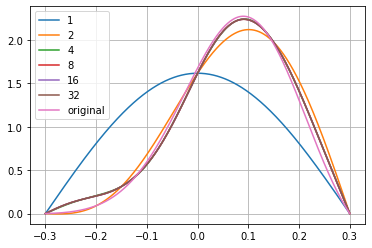

In [3]:
A = 2.763753976662478
l = 0.3
@njit
def simpson(n,a, b, N, l):
    def f(x,n):
        return (A*np.exp((-2*(x - 0.3/2)**2)/0.3**2)*np.cos((np.pi*x)/0.6)) * sincos(x,n, l)
    h = (b-a)/N
    s = f(a,n) + f(b,n) + 4*f(b-h,n)
    for k in range(1, N//2):
        s += 4*f(a + (2*k-1)*h,n) + 2*f(a+2*k*h,n)
    I = h/3*s
    return I

l = [1, 2, 4, 8, 16, 32]
for t in l:
    print(f'O valor de a{t} = {simpson(t,-0.3, 0.3, 100, 0.3)} ')

def psi(x):
    return A*np.exp((-2*(x - 0.15)**2)/((0.3)**2))*np.cos((np.pi/0.6)*x)

Xs = np.linspace(-0.3, 0.3, 1000)
N = [1,2,4,8,16,32]
Z = np.zeros(1000)

for a in N:
    for i in range(a):
        y = [simpson(i, -0.3, 0.3, 100, 0.3)*sincos(x, i, 0.3) for x in Xs]
    for i, j in enumerate(y):
        for d, b in enumerate(Z):
            if i == d:
                Z[d] = y[i] + Z[d]
        
    plt.plot(Xs, Z, label = f'{a}')

plt.plot(Xs, [psi(xi) for xi in Xs], label = 'original')
plt.legend()
plt.grid()
plt.show()

3.  A própria equação de Schrödinger também pode ser expressa à custa
das funções $\Phi_{n}$. Quando expressa nesta base, toma a forma 

$$
\sum_{n=0}^{\infty}H_{nm}a_{m}=\varepsilon a_{n}
$$
que é um problema de valores próprios, onde $\varepsilon$ (o valor
próprio) é a energia em unidades adimensionais e $H$ define a matriz
hamiltoniana. Os elementos da matriz hamiltoniana são obtidos por 

$$
H_{nm}=\int_{-L}^{L}dx\Phi_{n}^{*}\left(x\right)\left[-\frac{\hbar^{2}}{2M}\frac{d^{2}}{dx^{2}}+\frac{1}{2}M\omega^{2}x^{2}\right]\Phi_{m}\left(x\right)
$$
Adimensionalize esta expressão ao comprimento $L_{0}$ e à energia $E_{0}$. Escreva uma função $\texttt{python}$ que construa a matriz $H$ considerando
apenas <b>as $N$ ondas estacionárias $\Phi_{n}$ de maior comprimento
de onda</b>. O número $N$ deve ser um argumento da função. Verifique
numericamente que a matriz $H$ é simétrica.
Os seguintes integrais poderão ser úteis

$$
\int_{-1}^{1}\!\!\!\cos\left(\frac{\pi\left(m+1\right)\,y}{2}\right)\cos\left(\frac{\pi\left(n+1\right)\,y}{2}\right)dy=\!\!\int_{-1}^{1}\!\!\!\sin\left(\frac{\pi\left(m+1\right)\,y}{2}\right)\sin\left(\frac{\pi\left(n+1\right)\,y}{2}\right)dy\!=\!\delta_{nm}
$$
Para os senos, $m$ e $n$ são ímpares

$$
\int_{-1}^{1}\!\!\!y^{2}\sin\left(\frac{\pi\left(m+1\right)\,y}{2}\right)\sin\left(\frac{\pi\left(n+1\right)\,y}{2}\right)dy=\begin{cases}
\frac{1}{3}-\frac{2}{\pi^{2}\left(m+1\right)^{2}} & n=m\\
\frac{32(m+1)(n+1)}{\pi^{2}(m-n)^{2}(m+n+2)^{2}}\left(-1\right)^{\frac{m+3n}{2}} & n\neq m
\end{cases}
$$
Para os cosenos, $m$ e $n$ são sempre pares:

$$
\int_{-1}^{1}\!\!\!y^{2}\cos\left(\frac{\pi\left(n+1\right)}{2}y\right)\cos\left(\frac{\pi(n+1)\,y}{2}\right)dy=\begin{cases}
\frac{1}{3}-\frac{2}{\pi^{2}(m+1)^{2}} & n=m\\
\frac{32(m+1)(n+1)}{\pi^{2}(m-n)^{2}(m+n+2)^{2}}\left(-1\right)^{\frac{m+3n}{2}} & n\neq m
\end{cases}
$$

#Responda Aqui

In [4]:
@njit
def Hamilton(N,l):
    H = np.zeros((N,N))
    for m in range(N): 
        for n in range(N): 
            if (m + n)%2 == 0:
                if m == n:
                    H[m][n]= ((1/3)- (2/(np.pi**2*(m+1)**2))) + (((np.pi**2)*(m+1)**2)/(4*l**4))
                if m != n:
                    H[m][n]= (32*(m+1)*(n+1)) / ((np.pi**2)*((m-n)**2)*((m+n+2)**2)) * ((-1)** ((m+3*n)/2))

    return H
Hamilton(4,20)

array([[ 0.13070639,  0.        , -0.15198178,  0.        ],
       [ 0.        ,  0.28273443,  0.        , -0.18012655],
       [-0.15198178,  0.        ,  0.31095631,  0.        ],
       [ 0.        , -0.18012655,  0.        ,  0.32091493]])

4. Escreva uma rotina que faça a decomposição $QR$ da matriz $H$ com
o método de Householder e calcule os seus valores próprios $\varepsilon_{n}$
e correspondentes vectores próprios $\mathbf{v}_{n}$. A função deverá
retornar os valores próprios ordenados por ordem crescente, ou seja,
deve retornar um array $\left(\varepsilon_{1},\varepsilon_{2},\cdots,\varepsilon_{N}\right)$
tal que $\varepsilon_{1}\leq\varepsilon_{2}\leq\cdots\leq\varepsilon_{N}$.
Os vectores próprios $\mathbf{v}_{n}$, também devem sair ordenados
do mesmo modo. Os vectores próprios devem ser normalizados, i.e. $\mathbf{v}_{n}^{*}\cdot\mathbf{v}_{n}=1$.
[Nota: Pode escolher retornar os vectores numa lista $[\mathbf{v}_{1},\mathbf{v}_{2},\cdots,\mathbf{v}_{N}]$
ou numa matriz $P$ de dimensões $N\!\times\!N$ cujas colunas são
os vectores, ou seja $P[:,n]=\mathbf{v}_{n}$.]

#Responda Aqui

In [5]:
def QR_g(A):
    M = len(A)
    Q = np.zeros([M,M])
    R = np.zeros([M,M])
    for i in range(M):
        v = A[:,i] - np.dot(Q[:,:i] , np.dot(A[:,i], Q[:,:i]))
        vv = np.linalg.norm(v)
        Q[:,i] = v/vv
        R[i, i:] = np.dot(Q[:,i], A[:,i:])
    return Q,R
print(QR_g(Hamilton(4,20)))

def eigvals(N, l):
    A = Hamilton(N,l)
    A_new = np.copy(A)
    V = np.identity(N)
    V2 = np.identity(N)
    for i in range(1000):
        V = V2
        A = A_new
        Q, R = QR_g(A)
        A_new = np.dot(R,Q)
        V2 = np.dot(V,Q)
    autoval = [A_new [j,j] for j in range(N)]
    autovec = [V2[:,j] for j in range(N)]
    autoval, autovec = zip(*sorted(zip(autoval,autovec)))
    return autoval, autovec
eigvals(4,20)

(array([[ 0.65204518,  0.        ,  0.75818011,  0.        ],
       [ 0.        ,  0.84338488,  0.        ,  0.53730991],
       [-0.75818011,  0.        ,  0.65204518,  0.        ],
       [ 0.        , -0.53730991,  0.        ,  0.84338488]]), array([[ 0.20045603,  0.        , -0.33485987,  0.        ],
       [ 0.        ,  0.33523772,  0.        , -0.32434678],
       [ 0.        ,  0.        ,  0.087528  ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.17387102]]))


((0.04413678429909485,
  0.12068933663842886,
  0.39752590906447727,
  0.48296001538931044),
 (array([0.86892484, 0.        , 0.49494407, 0.        ]),
  array([0.        , 0.74343533, 0.        , 0.66880782]),
  array([ 0.49494407,  0.        , -0.86892484,  0.        ]),
  array([ 0.        ,  0.66880782,  0.        , -0.74343533])))

5. Represente os primeiros $30$ valores próprios para $\ell=0.5$ e
$\ell=20$. Utilize um $N$ suficientemente grande para que estes
valores estejam convergidos. Compare estes resultados com os níveis
de energia que esperaria para uma partícula confinada a uma caixa
e os níveis de energia de um oscilador harmónico quântico. Interprete
os resultados.

É visto que, quanto maior o valor de $\ell$ os níveis permitidos de energia caem drasticamente, porque ao aumentar $\ell$ aumentamos a incerteza de sua posição, o que está de acordo com o princípio da incerteza de Heisenberg. 

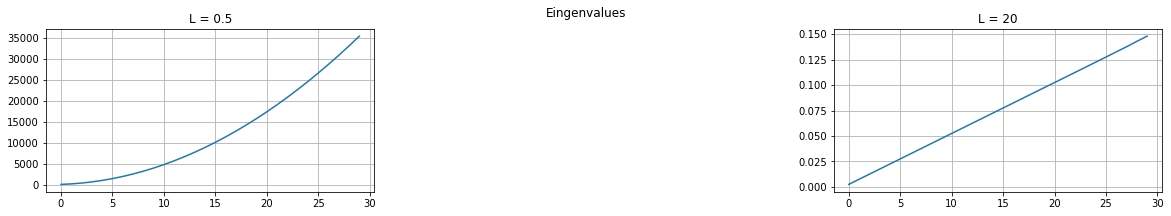

In [6]:
def eigenvalues_30(N, l):
    valores, vetores = eigvals(N, l)
    return valores[0:30]

figura= plt.figure(figsize=(20,3))
figura.suptitle('Eingenvalues')             
figura.add_subplot(131)                      
plt.plot(eigenvalues_30(100, 0.5))
plt.grid()
plt.title('L = 0.5')
figura.add_subplot(133)
plt.plot(eigenvalues_30(100, 20))
plt.grid()
plt.title('L = 20')
plt.show()

6. Represente agora, num mesmo gráfico, curvas com os primeiros $10$
valores próprios como função de $\ell$, num intervalo $\ell\in[10^{-2},10^{2}]$.
Justifique os resultados. [Nota: Estude bem a melhor forma
de representar estes gráficos.]

A medida que $\ell$ aumenta, os autovalores da Hamiltoniana, que são os níveis de energia permitidos, tendem a valores fixos, uma vez que o sistema tende a um oscilador harmonico infinito. O espaçamento dos valores de E deveriam ser igualmente espaçados, o que não ocorre. Isto ocorre pelo facto de N não ser suficientemente grande.

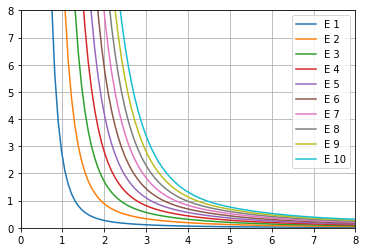

In [7]:
lista = []
def eigenvalues_10(N, l):
    valores, vetores = eigvals(N,l)
    for i in range(len(valores)):
        lista.append(valores[i])
    return lista

N = 20
ls = np.linspace(0.1, 8, 100)
for l in ls:
    eigenvalues_10(N, l)

for i in range(10):
    plt.plot(ls,[lista[i] for i in range(0+i, N*100, N)], label = f'E {i+1}')
    plt.ylim(0, 8)
    plt.xlim(0, 8)
    plt.legend()
plt.grid()
plt.show()

7. Para $\ell\!=\!20$ represente, em paineis diferentes, as densidades
de probabilidade associadas aos primeiros $8$ valores próprios. Compare
cada gráfico com o resultado esperado para um oscilador harmónico
quântico. Justifique o que vê. [Nota: Não se esqueça que
todos os vectores estão na base $\left\{ \Phi_{n}(x)\right\} _{n}$.
Se quiser representar os estados como função da posição, terá de utilizar
a Eq. 1.2]

A distribuição de probabilidade para cada nível consiste no número de picos igual ao nível de energia. Para níveis suficientemente grandes, a distribuição se parece com ao de um oscilador clássico, com menor probabilidade no centro e maior nos extremos

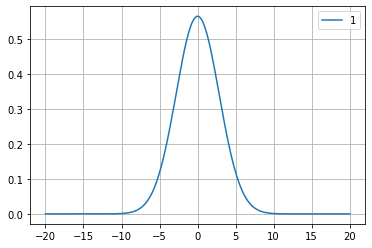

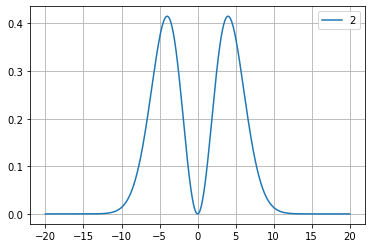

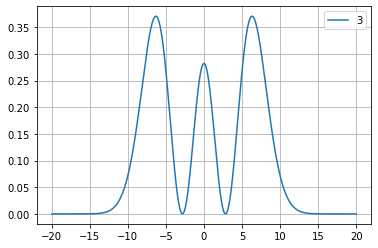

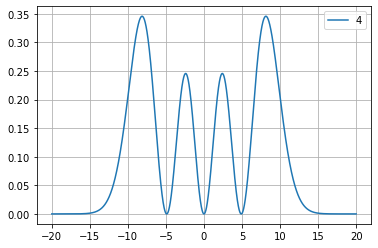

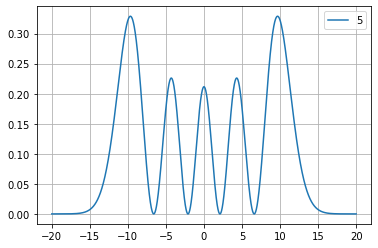

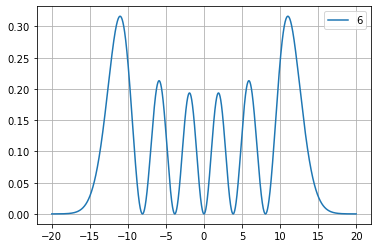

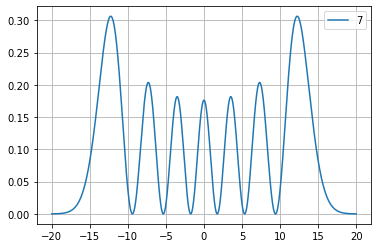

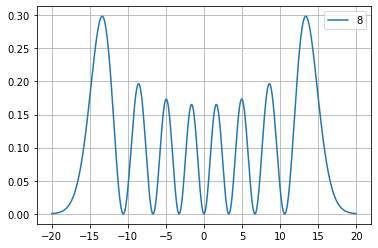

In [8]:
l = 20
Xs = np.linspace(-l, l , 10000)
X, V = eigvals(100,20)
@njit
def sincos(x, n, l):
    if n%2 == 0:
        return (1/np.sqrt(l)*np.cos((np.pi*(n+1)*x)/(8*l)))
    else:
        return (1/np.sqrt(l)*np.sin((np.pi*(n+1)*x)/(8*l)))
@njit
def psi2(x, n):
    s = 0
    for i in range(len(V[0])):
        s += V[n][i] * (sincos(x, i, l))
    return s**2

for i in range(8):
    plt.plot(Xs, [psi2(a, i) for a in Xs], label = f'{i+1}')
    plt.legend()
    plt.grid()
    plt.show()

# Oscilador Harmónico Quântico II

No problema anterior, resolveu-se o oscilador harmónico quântico exprimindo
cada estado próprio, $\Psi_{E}(x)$, como uma combinação de todas
as ondas estacionárias da caixa $x\in[-L,L]$. Agora, vamos repetir
a mesma análise mas considerando apenas metade dessas ondas, isto
é,

$$
\Psi_{E}(x)=\sum_{n=0}^{\infty}a_{n}(E)\chi_{n}(x),
$$
onde as funções $\chi_{n}(x)$ são dadas por


\begin{eqnarray*}
\chi_{n}\left(x\right) & = & \frac{1}{\sqrt{L}}\sin\left(\frac{\pi\left(n+1\right)}{L}x\right)
\end{eqnarray*}
O conjunto dos $\left\{ \chi_{n}\right\} _{n}$ representa uma sub-base
de funções ímpares da base $\left\{ \Phi_{n}\right\} _{n}$. Responda
então às seguintes questões:

1. Escreva uma função que construa a matriz hamiltoniana $H_{nm}^{\prime}$
para o sistema escrito nos primeiros $N$ elementos nesta base.

\begin{eqnarray*}
\chi'{n}\left(x\right) & = \chi{n}\left(x\right)  \sqrt{L_0} = & \frac{1}{\sqrt{l}}\sin\left(\frac{\pi\left(n+1\right)}{\ell}x'\right)
\end{eqnarray*}

Neste caso, a adimensionalização é análoga a 1.1. Entretanto, usaremos apenas os valores quando m e n forem ímpares.

In [9]:
@njit
def Hamilton2(N, l):
    A = np.zeros((N,N))
    for n in range(N):
        for m in range(N):
            if n % 2 != 0:
                if n == m:
                    if (n+m) % 2 == 0:
                        A[n][m] = ((1/3)- (2/(np.pi**2*(m+1)**2))) + (((np.pi**2)*(m+1)**2)/(4*l**4))
                if n != m:
                    if (n+m) % 2 == 0:
                        A[n][m] = (32*(m+1)*(n+1)) / ((np.pi**2)*((m-n)**2)*((m+n+2)**2)) * ((-1)** ((m+3*n)/2))
    return(A)
Hamilton2(4,20)

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.28273443,  0.        , -0.18012655],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.18012655,  0.        ,  0.32091493]])

2. Com o algoritmo $QR$ do problema anterior, escreva uma função que
calcule os valores e vetores próprios (ordenados) deste
sistema, tomando $N$ como argumento.

#Responda Aqui

In [10]:
def QR2(A):
    M = len(A)
    Q = np.zeros([M,M])
    R = np.zeros([M,M])
    for i in range(M):
        v = A[:,i] - np.dot(Q[:,:i] , np.dot(A[:,i], Q[:,:i]))
        vv = np.linalg.norm(v)
        if i %2 != 0:
            Q[:,i] = v/vv
        R[i, i:] = np.dot(Q[:,i], A[:,i:])
    return Q,R

def Eingen2(N, l):
    A = Hamilton2(N,l)
    A_new = np.copy(A)
    V = np.identity(N)
    V2 = np.identity(N)
    for i in range(1000):
        V = V2
        A = A_new
        Q, R = QR2(A)
        A_new = np.dot(R,Q)
        V2 = np.dot(V,Q)
    autova = []
    autovt = []
    for j in range(N):
        if A[j,j] != 0:
            autova.append(A_new[j,j])
            autovt.append(V2[:,j])
    autova, autovt = zip(*sorted(zip(autova,autovt)))
    return autova, np.array(autovt)

auto_valor, auto_vetor = Eingen2(30, 0.5)

3. Para $\ell=20$ e com um $N$ adequado, determine os primeiros $15$ valores próprios do sistema
e compare-os com o que obteve no Problema 1.5. Porque obtém um resultado
diferente?

Os resultados são diferentes porque como a matriz Hamiltoniana tem sua primeira linha e diagonal igual a zero, utilizamos apenas os senos da matriz dos autovetores para formar a função $\Phi(x)$. Ou seja, somente os índices ímpares são utilizados.

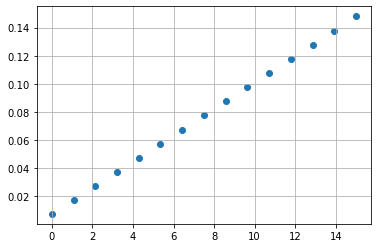

In [11]:
l = 20
valor_proprio = Eingen2(100, 20)[0]
x = np.linspace(0, 15,15)
plt.scatter(x, [valor_proprio[i] for i in range(15)])
plt.grid()
plt.show()

4.  Para os primeiros $4$ estados próprios represente as correspondentes
densidades de probabilidade. Como se comparam estes estados com os
obtidos em 1.7? Justifique.

Como considerámos apenas a sub-base dos senos, o gráfico em relação a 1.7 correspondem aos $(2N + 1)$ níveis. Logo, só observamos metade dos estados próprios da 1.7.

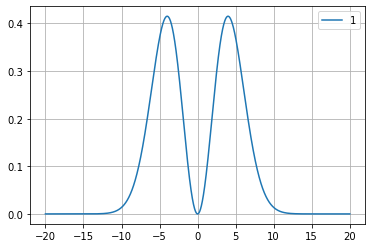

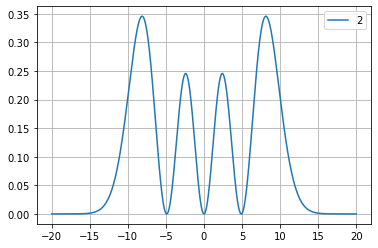

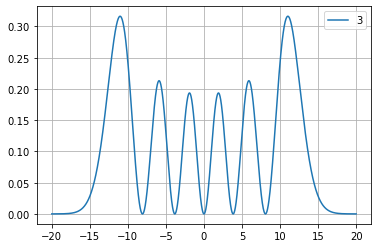

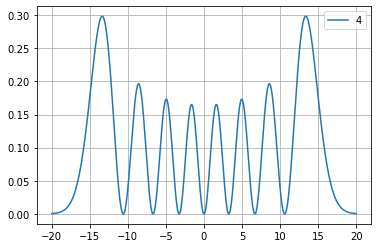

In [12]:
l = 20
Xs = np.linspace(-l, l , 10000)
Avl, Avt = Eingen2(100,20)
@njit
def sincos(x, n):
    if n%2 == 0:
        return (1/np.sqrt(l)*np.cos((np.pi*(n+1)*x)/(8*l)))
    else:
        return (1/np.sqrt(l)*np.sin((np.pi*(n+1)*x)/(8*l)))
@njit
def psi2(x, n):
    s = 0
    for i in range(len(Avt[0])):
        s += Avt[n][i] * (sincos(x, i))
    return s**2

for i in range(4):
    plt.plot(Xs, [psi2(a, i) for a in Xs], label = f'{i+1}')
    plt.legend()
    plt.grid()
    plt.show()

5. Com base nos resultados anteriores, diga o que esperaria que acontecesse
se a sub-base fosse a dos cosenos em vez da dos senos.

Se a sub-base fosse a dos cosenos, a nova Hamiltoniana só teria elementos onde m e n são pares, os autovalores seriam os autovalores com índices pares, e os estados próprios seriam os índices pares dos estados próprios da 1.7. Portanto, os gráficos ficariam diferentes, já que estaríamos a utilizar a sub-base dos cosenos.

In [13]:
# Responda Aqui

# Equação de Schrödinger Dependente do Tempo

Considere o sistema do Problema $1$ com $L=20L_{0}$. Vamos agora
utilizar os métodos que explorámos para resolver a equação de Schrödinger
dependente do tempo,


\begin{equation}
i\hbar\frac{d}{dt}\mathbf{\Psi}\left(t\right)=H\mathbf{\psi}\left(t\right),\label{eq:SchrodingerTempo}
\end{equation}
onde $H$ é a matriz Hamiltoniana \textbf{na base $\left\{ \Phi_{n}\right\} _{n}$}
e $\boldsymbol{\Psi}\left(t\right)$ é um vetor arbitrário \textbf{na
mesma base} que depende do tempo. Este é um sistema de equações diferenciais
acopladas que pode ser resolvido com um método de Runge-Kutta, mas
o conhecimento de uma base de $N$ vectores próprios $\left\{ \mathbf{v}_{0},\mathbf{v}_{1},\cdots,\mathbf{v}_{N-1}\right\} $
de $H$ permite resolvê-lo de modo mais simples. Se $\Psi\left(t\right)=\mathbf{v}_{n}\left(t\right)$
for um dos vectores próprios de $H$, com valor próprio $\varepsilon_{n}$,
sabemos que $H\mathbf{v}_{n}=\varepsilon_{n}\mathbf{v}_{n}$ e, por
isso, $i\hbar\frac{d}{dt}\mathbf{v}_{n}\left(t\right)=\varepsilon_{n}\mathbf{v}_{n}\left(t\right)$.
Esta equação diferencial tem uma solução simples dada por 

$$
\mathbf{v}_{n}\left(t\right)=\mathbf{v}_{n}e^{-i\varepsilon_{n}t/\hbar}
$$
sendo que $\mathbf{v}_{n}\left(t\right)$ é o vector $\mathbf{v}_{n}$
no instante $t$ e continua a ser um vector próprio de $H$ com o
mesmo valor próprio. Neste exercício, vamos utilizar o que aprendemos
até agora para encontrar a evolução temporal $\psi\left(x,t\right)$
da seguinte função de onda

$$
\psi\left(x\right)=\psi\left(x,t=0\right)=Be^{ikx}\exp\left(-\frac{\left(x-x_{0}\right)^{2}}{2\sigma^{2}}\right)\cos\left(\frac{\pi x}{2L}\right)
$$

segundo a equação de Schrödinger (Eq. 1.3),
onde $\sigma=L/8$, $x_{0}=0$ e $k=2/L_{0}$. Então responda ao seguinte:


1. Comece por adimensionalizar $\psi\left(x\right)$ e determinar $B$
numericamente. Tal como no primeiro exercício, escreva uma rotina
que devolva o vector $\Psi$ composto pelos coeficientes $a_{n}$
de $\psi\left(x\right)$ na base $\left\{ \Phi_{n}\right\} _{n}$.
[Nota: Verifique que consegue reobter $\psi\left(x\right)$
com estes coeficientes para $N$ suficientemente grande.]

Adimensionalizando a equação de $\Psi(x)$, obtemos:

$$
 \psi\left(x\right)=\psi\left(x,t=0\right)=Be^{2 i x}\exp\left(-32\ \left( \frac{x'}{\ell}\right)^2 \right)\cos\left(\frac{\pi x}{2L}\right) $$

onde $x = x/L_0$ e $\ell = L/L_0$.

In [14]:
@njit
def findB(x):
    return np.exp(2*1j*x) * np.exp((-32*(x/20)**2)) * np.cos((np.pi*x)/ (40))

@njit
def simpsonB(a, b, N):
    def f(x):
        return findB(x) * np.conjugate(findB(x))
    h = (b-a)/N
    s = f(a) + f(b) + 4*f(b-h)
    for k in range(1, N//2):
        s += 4*f(a + (2*k-1)*h) + 2*f(a+2*k*h)
    I = h/3*s
    return I

B = 1 / np.sqrt(np.real(simpsonB(-20,20,1000)))
print(f'Valor de B = {B}\n')
@njit
def psi3(x):
    return B * (np.exp(-2*1j*x)) * (np.exp(-32*(x/20)**2)) * np.cos((np.pi*x)/ (2*20))

@njit
def sincos3(x, n):
    if n % 2 == 0:
        return (1/np.sqrt(20))*np.cos((np.pi*(n+1)*x)/(2*20))
    if n % 2 != 0:
        return (1/np.sqrt(20))*np.sin((np.pi*(n+1)*x)/(2*20))
@njit
def simpson2(n,a, b, N):
    def f(x,n):
        return  psi3(x) * sincos3(x,n)
    h = (b-a)/N
    s = f(a,n) + f(b,n) + 4*f(b-h,n)
    for k in range(1, N//2):
        s += 4*f(a + (2*k-1)*h,n) + 2*f(a+2*k*h,n)
    I = h/3*s
    return I
an = []
for i in np.arange(0,100,1):
    an.append(simpson2(i, -20, 20, 1000))
print(f'an = {an}')

Valor de B = 0.47960979026181766

an = [(5.463240629071897e-06+1.2140447807090535e-17j), (-5.317604696625169e-18-1.1391173913486687e-05j), (2.7564577266196313e-05-5.538287791516472e-18j), (-1.81713488817954e-17-6.236416851167628e-05j), (0.00013646058069442145+2.431184291667584e-17j), (-1.2264512177920479e-17-0.0002873568672039549j), (0.0005827994405566247+4.696855640495875e-17j), (-3.864638724028201e-17-0.0011383372035014764j), (0.0021414266635986557+4.2322637516413326e-17j), (-3.497595803643533e-17-0.0038800206819287948j), (0.0067714653342227675+7.985737331142845e-17j), (-1.0067439656440838e-16-0.011383292891594472j), (0.01843352263080322+8.14149022973307e-17j), (-1.2393477164470067e-16-0.028755571653715017j), (0.0432141892360786+8.211650281013212e-17j), (-1.183918072587834e-16-0.0625659599470199j), (0.08727161284347826+6.161810327646842e-17j), (-1.0091912615935974e-16-0.11728588249940079j), (0.1518692384486481+5.826360316551075e-17j), (-7.401081623897764e-17-0.1894773780660326j), (0.

2.  O vector $\Psi$ pode ser expresso à custa dos vectores próprios de
$H$:

$$
\Psi=\sum_{n=0}^{N-1}\psi_{n}\!\mathbf{v}_{n}
$$

onde $\psi_{n}=\mathbf{v}_{n}^{*}\cdot\mathbf{\Psi}$. Determine estes
coeficientes $\psi_{n}$.

#Responda Aqui

In [15]:
def QR__(N,l):
    A = Hamilton(N,l)
    A2 = np.copy(A)
    V = np.identity(N)
    V2 = np.identity(N)
    for i in range(1000):
        V = V2
        A = A2
        Q,R = QR_g(A)
        A2 = np.dot(R,Q)
        V2 = np.dot(V,Q)
    autoval = []
    autovet = []
    for j in range(N):
        autoval.append(A2[j,j])
        autovet.append(V2[:,j])
    autoval,autovet = zip(*sorted(zip(autoval,autovet)))
    return(autoval, np.array(autovet))

psi_n = []
l = 20
N = 100
autovetores = QR__(N, l)[1]
for i in range(N):
    psi_n.append(autovetores[:,i] @ an)
print(psi_n)

[(0.2604220188439487-7.275885283710985e-17j), (1.7726102430225584e-16-0.12702711347721557j), (-0.047521115030182415+2.1829667471186433e-17j), (-6.125601971052868e-18-0.06423622917710185j), (-0.2953386962187331+2.2678219123555963e-17j), (6.939927265330378e-17+0.1118821038920398j), (-0.19537454677044103-4.500488758095038e-18j), (-9.680323834596014e-17+0.1562070203745988j), (0.12260290821356974+2.615883847266372e-17j), (-6.440434043689746e-17-0.013123757858507251j), (0.2872536308175401+2.3061463600465654e-16j), (-1.050188017434198e-16-0.19411851977984731j), (0.129165384202209-1.8564028803107868e-16j), (6.260568616261676e-17-0.15366887903827245j), (-0.1502841337403131+5.934421749795408e-17j), (-4.1428445661628394e-17+0.07552283395667272j), (-0.24500201656121415-8.544870773037115e-17j), (2.0105794273934033e-16+0.23136001715296958j), (-0.08556054461274899-5.062098709430388e-17j), (-3.662900208706203e-17+0.13632175967917542j), (0.12958477357713044-2.745517089864724e-17j), (4.447601632353972e-

3.  Dado que sabemos como é que os vectores próprios $\mathbf{v}_{n}$
dependem do tempo, a dependência temporal do vector $\Psi\left(t\right)$
fica simplesmente

$$
\Psi\left(t\right)\!=\!\!\sum_{n=0}^{N-1}\psi_{n}e^{-i\varepsilon_{n}t/\hbar}\mathbf{v}_{n}
$$

Adimensionalize a expressão, calcule o vector $\Psi\left(t\right)$
nos instantes $t=0,0.5\tau,1.0\tau,1.5\tau$, onde $\tau=1/\omega$,
e utilize-o para calcular e representar $\psi\left(x,t\right)$ nestes instantes
temporais.

Como esperado, vemos que a medida que o tempo passa, o gráfico começa a ter oscilações onde a função era nula. Observamos também que a medida que t aumenta, a função de onda aumenta mais para a direita, o que mostra que o seu momento tem componente na direção positiva do eixo xx.

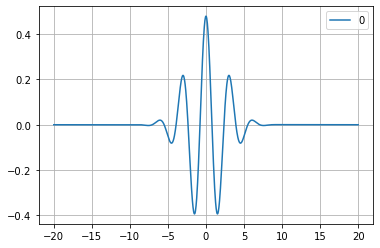

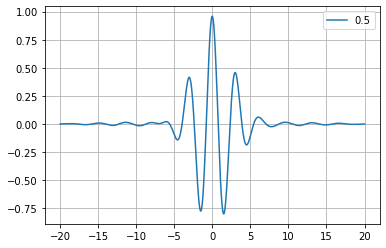

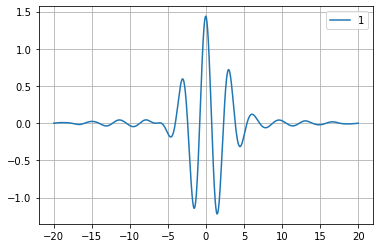

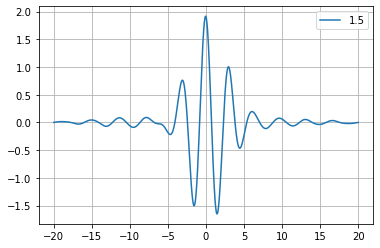

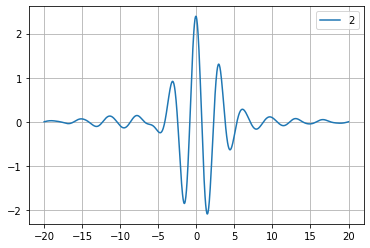

In [16]:
l = 20
t = [0, 0.5, 1, 1.5, 2]
auto_val, auto_vet = QR__(100,l)
Psi = np.zeros([100, 1])
@njit
def sincosf(x, n, l):
    if n%2 == 0:
        return (1/np.sqrt(l)*np.cos((np.pi*(n+1)*x)/(2*l)))
    else:
        return (1/np.sqrt(l)*np.sin((np.pi*(n+1)*x)/(2*l)))

for ti in t:    
    for i in range(100):
        for j in range(100):
            Psi[i] += np.real(psi_n[j] * np.exp(-1j * auto_val[j] * ti) * auto_vet[i][j])
    X = np.linspace(-20, 20, 1000)
    wave = []
    for xi in X:
        w = 0
        for k in range(100):
            w += Psi[k] * sincosf(xi, k, l)
        wave.append(w)
    plt.plot(X, wave, label = f'{ti}')
    plt.legend()
    plt.grid()
    plt.show()

4. Determine o valor médio da posição $\left\langle x\right\rangle \left(t\right)$
da densidade de probabilidade $\left|\psi\left(x,t\right)\right|^{2}$
como função do tempo ao longo de $3$ períodos de oscilação. O que
observa? Compare com a trajectória clássica com as mesmas condições
iniciais para a posição e para o momento $(x_{0}$ e $\hbar k$). [Nota: o valor
inicial do momento é $\hbar k$ e o valor médio da posição pode ser
encontrado com o seguinte integral: $\left\langle x\right\rangle \left(t\right)=\int_{-L}^{L}dx\psi^{*}\left(x,t\right)x\psi\left(x,t\right)$]

#Responda Aqui

In [17]:
# Responda Aqui

Bom Trabalho